In [18]:
import pandas_datareader as web
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

crypto_currency = 'BTC'
against_currency = 'USD'
start = dt.datetime(2016, 1, 1)
end = dt.datetime.now()

In [2]:
df = pd.read_csv('BTC-USD.csv')

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

preddays = 10

x_train, y_train = [], []
for x in range(preddays, len(scaled_data)):
    x_train.append(scaled_data[x-preddays:x, 0])
    y_train.append(scaled_data[x, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]))

In [9]:
test_start = dt.datetime(2021, 6, 1)
test_end = dt.datetime.now()
test_data = data.loc[(data.index >= test_start) & (data.index <= test_end)]
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

In [10]:
model_inputs = total_dataset[len(total_dataset) - len(test_data) - preddays:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.fit_transform(model_inputs)

x_test = []

for x in range(preddays,  len(model_inputs)):
    x_test.append(model_inputs[x-preddays:x, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]))

In [24]:
def pred_plot(Y):
    Y=Y.reshape(547,1)
    pred = scaler.inverse_transform(Y)

    plt.figure(figsize=(16,9))
    plt.plot(actual_prices, color='black', label='Actual Prices')
    plt.plot(pred, color='green', label='Predicted Prices')
    plt.title(f'BTC price prediction')
    plt.xlabel('Time Period')
    plt.ylabel('Price')
    plt.legend(loc='upper left')
    plt.show()
    plt.savefig("btc_price_prediction", dpi=1000)

SVM Prediction

In [5]:
from sklearn.svm import SVR

In [6]:
svr_lin = SVR(kernel='linear', C=100, gamma='auto')

In [7]:
svr_lin.fit(x_train,y_train)

SVR(C=100, gamma='auto', kernel='linear')

In [11]:
y_lin = svr_lin.predict(x_test)

In [15]:
y_lin.shape

(547,)

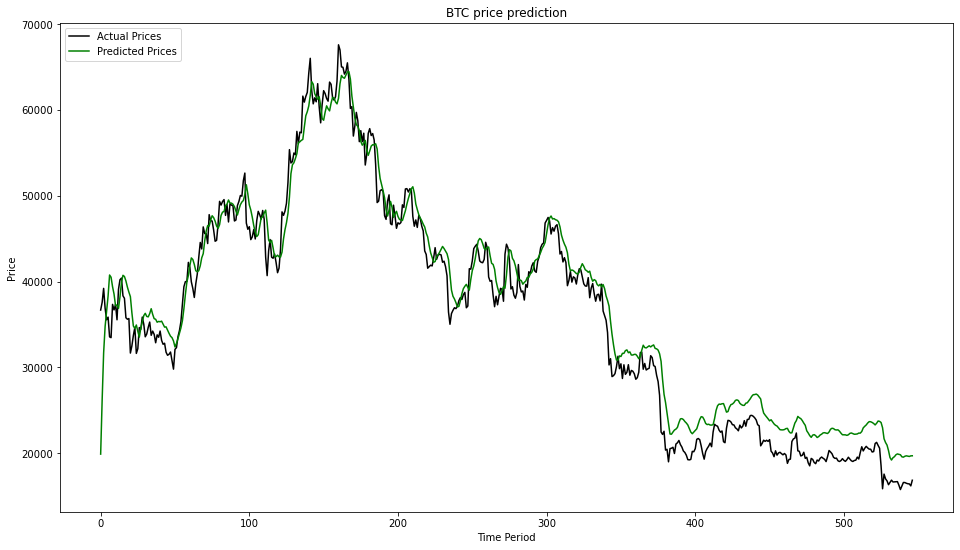

<Figure size 432x288 with 0 Axes>

In [25]:
pred_plot(y_lin)

In [ ]:
LinearRegression Prediction

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lin_regression = LinearRegression()

In [28]:
lin_regression.fit(x_train, y_train)

LinearRegression()

In [29]:
lin_y_pred_1 = lin_regression.predict(x_test)

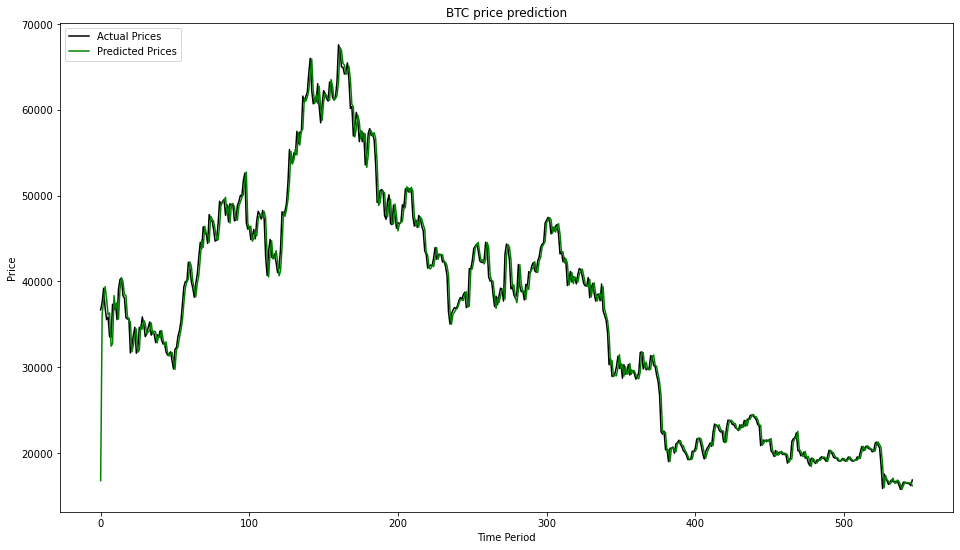

<Figure size 432x288 with 0 Axes>

In [30]:
pred_plot(lin_y_pred_1)

In [ ]:
DecisionTreeRegressor Prediction

In [31]:
from sklearn import tree

In [32]:
clf = tree.DecisionTreeRegressor()

In [34]:
clf = clf.fit(x_train, y_train)

In [35]:
tree_y_pred_1 = clf.predict(x_test)

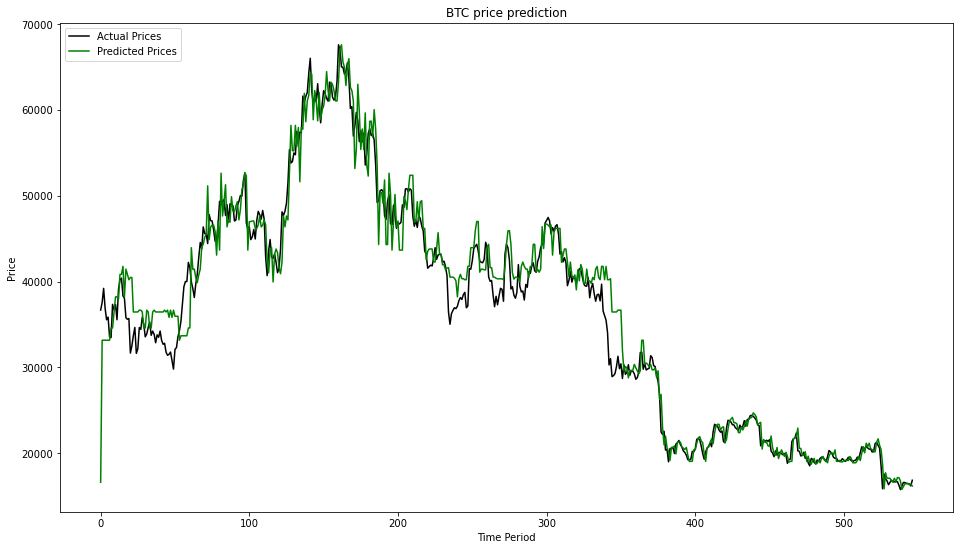

<Figure size 432x288 with 0 Axes>

In [36]:
pred_plot(tree_y_pred_1)